Second try of the Pol code since the first one did not give any sensible fits

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.signal import find_peaks
%matplotlib inline

In [108]:
df0=pd.read_excel('POL Daten.xlsx',sheet_name='t, phi')
labels=list(df0.columns)  #Nehme mir die labels von den spalten
labels=labels[1:] #Erste weg, ist ja t
lambda_list=[]
omega_list=[]
omega_fehler=[]
lambda_fehler=[]

df0.head()

,Time [s],Phi [deg] 0.2A,Phi [deg] 0.29A,Phi [deg] 0.4A,Phi [deg] 0.49A,Phi [deg] 0.6A,Phi [deg] 0.7A,Phi [deg] 0.81A,Phi [deg] 0.9A,Phi [deg] 1.0A,Phi [deg] 1.1A,Phi [deg] 1.2A,Phi [deg] 1.3A,Phi [deg] 1.4A,Phi [deg] 1.5A
0,0.025,-0.0076,-0.0072,-0.0084,-0.0080,-0.0088,-0.0092,-0.0068,-0.0100,-0.0086,-0.0080,-0.0058,-0.0090,-0.0070,-0.0056
1,0.075,-0.0090,-0.0054,-0.0086,-0.0070,-0.0106,-0.0062,-0.0084,-0.0084,-0.0088,-0.0074,-0.0062,-0.0080,-0.0066,-0.0072
2,0.125,-0.0088,-0.0082,-0.0078,-0.0084,-0.0074,-0.0074,-0.0066,-0.0074,-0.0082,-0.0084,-0.0060,-0.0080,-0.0058,-0.0056
3,0.175,-0.0096,-0.0072,-0.0086,-0.0078,-0.0094,-0.0066,-0.0078,-0.0094,-0.0074,-0.0074,-0.0062,-0.0078,-0.0078,-0.0070
4,0.225,-0.0088,-0.0080,-0.0068,-0.0082,-0.0082,-0.0082,-0.0078,-0.0094,-0.0094,-0.0078,-0.0062,-0.0094,-0.0054,-0.0058


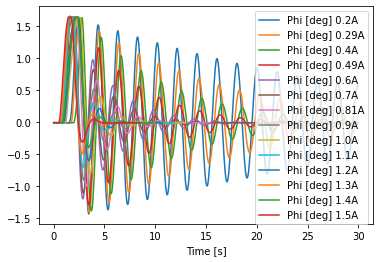

In [109]:
df0.plot(x="Time [s]")

Will try the code for one dataset. New ideas:
Start at maximum since I'm using a cosine function which starts at 1, so we can ignore the phaseshift

In [110]:
I=[0.2,0.29,0.4,0.49,0.6,0.7,0.81,0.9,1,1.1,1.2,1.3,1.4,1.5]

In [140]:
for i in range(len(labels)):
    df=df0.copy(deep=True) #necessary to create copy, otherwise orginal dataframe will be modyfied. Problem for t data
    title=labels[i]
    t=df['Time [s]'] #define x data
    phi=df[title].dropna() #define y data, dropna makes sure i have no nans in my data, which are there since the datasets 
    #are not all the same length
    max_pos=df.idxmax() #finding index of maximum for each dataset
    max_pos=max_pos[1:] #getting rid of max for the time column
    phi0=df[title][max_pos[i]] #setting phi0 as maximum of function
    phi=phi[max_pos[i]:] #making y data start at maximum
    phi=phi.reset_index(drop=True) #resets index of phi, useful for while loop otherwise difficult to call elements
    count=0
    while (phi[0]-phi[1])<(phi[0]/100):
        del phi[0]
        phi=phi.reset_index(drop=True) #have to reset it every time
        count+=1
    t_max=t[max_pos[i]] #need to shift the t to zero to get a good fit so we need t value of starting point
    t=t[max_pos[i]+count:] #making x data start at max of y
    t-=t_max
    t=t.reset_index(drop=True)
    if len(t)!= len(phi): #just making sure that x and y have the same length
        t=t[:len(phi)]
    def func(t, lam, omega, beta, phi): #defining ,my function here after finding Phi0, otherwise have to use lambda funct to 
        #pass parameter i think
        return phi*np.exp(-lam*t)*np.cos(omega*t+beta)
    popt, pcov = curve_fit(func, t, phi,maxfev=5000) #this is just fitting, we are interested in the first to things that popt returns
    lambdat,omegat,betat, phi=popt[0],popt[1],popt[2],popt[3] #assigning a bit of stuff to make the code more readable
    lambda_list.append(lambdat)
    omega_list.append(omegat)
    fehler=np.sqrt(np.diag(pcov))
    #lambdafehler, omegafehler = fehler[0], fehler[1] davon muss man noch die wurzel ziehen
    omega_fehler.append(fehler[1])
    lambda_fehler.append(fehler[0])

In [141]:
phi=df[title]
print(phi)

0     -0.0056
1     -0.0072
2     -0.0056
3     -0.0070
4     -0.0058
        ...  
595       NaN
596       NaN
597       NaN
598       NaN
599       NaN
Name: Phi [deg] 1.5A, Length: 600, dtype: float64


In [126]:
lambda_list

[0.036230741630449106,
 0.07417633337467791,
 0.1258957288077742,
 0.18145238681955841,
 0.2642580320020387,
 0.3489455728843724,
 0.46334242597593794,
 0.5759067661557854,
 0.698043345077656,
 0.8369132754118522,
 0.9795464639482916,
 1.154917252250028,
 1.3274802783236586,
 1.4987945450540505]

In [129]:
lambda_fehler

[0.0009091413974328875,
 0.0008721323691673068,
 0.0010198511415803115,
 0.0011265612512952102,
 0.001295279065465566,
 0.0016882239817346753,
 0.0021978619180317064,
 0.0024069858412060045,
 0.002740397182424323,
 0.002904328377604656,
 0.003726578871285589,
 0.0042344624222764695,
 0.0055842978624245036,
 0.007973452969859216]

In [2]:
lambda_list_numpy=np.asarray(lambda_list)
lambda_fehler_numpy=np.asarray(lambda_fehler)

NameError: name 'np' is not defined

In [132]:
lambda_list_panda.to_latex()

'\\begin{tabular}{lr}\n\\toprule\n{} &  damping constant \\\\\n\\midrule\n0  &          0.036231 \\\\\n1  &          0.074176 \\\\\n2  &          0.125896 \\\\\n3  &          0.181452 \\\\\n4  &          0.264258 \\\\\n5  &          0.348946 \\\\\n6  &          0.463342 \\\\\n7  &          0.575907 \\\\\n8  &          0.698043 \\\\\n9  &          0.836913 \\\\\n10 &          0.979546 \\\\\n11 &          1.154917 \\\\\n12 &          1.327480 \\\\\n13 &          1.498795 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [6]:
omega=popt[1]

In [7]:
popt

array([ 1.49879455,  2.77679047, -0.67028345,  2.09291943])

# Following 2 plots are with wrong data
The following plots look bad because the last 5 data points somehow get fitted in a very weird way. further down it is done again witha a few manual adjustments to aparameters and we get much  better results

In [8]:
len(lambda_list)


14

In [11]:
len(I)

14

rows=[I][lambda_list][]
print('Tabulate Table:')
print(tabulate(rows, headers='firstrow'))
table = Texttable()
table.set_cols_align(["c"] * 4)
table.set_deco(Texttable.HEADER | Texttable.VLINES)
print('\nTexttable Table:')
print(table.draw())

print(‘\nTabulate Latex:’)
print(tabulate(rows, headers=’firstrow’, tablefmt=’latex’))
print(‘\nTexttable Latex:’)
print(latextable.draw_latex(table, caption=”fitted values of damping constant and natural freqhency”))

In [12]:
def format(xlabel, ylabel):
    plt.xlabel(xlabel, fontsize=15, labelpad=None)
    plt.ylabel(ylabel, fontsize=15, labelpad=None)
    plt.grid(b=True, which='major', axis='both')
    plt.xticks(fontsize=15 )
    plt.yticks(fontsize=15 )
    plt.show()
    

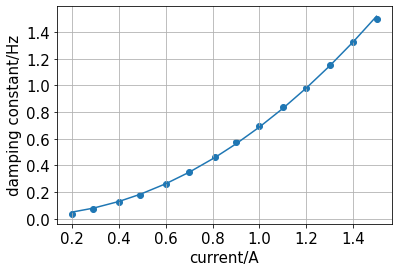

In [13]:
plt.scatter(I,lambda_list)
def func3(Strom,d,c):  
    return d*pow(Strom,2)+c
popt3, pcov3 = curve_fit(func3, I, lambda_list,maxfev=5000)

l=[func3(x,*popt3) for x in I]
xdata_liste=[]
for i in arrange(26):
    xdata_liste.append(xdate[i])
    
plt.plot(I, l)
plt.grid(b=True, which='major', axis='both')
format("current/A"  , "damping constant/Hz")


In [14]:
popt3

array([0.66481588, 0.02347392])

In [15]:
pcov3

array([[ 1.34310609e-05, -1.18867764e-05],
       [-1.18867764e-05,  1.71208460e-05]])

In [16]:
np.sqrt(np.diag(pcov3))

array([0.00366484, 0.00413773])

$\omega_d=\sqrt{\frac{k}{\Omega}-\lambda ^2}$

$\omega_0=\sqrt{\frac{k}{\Omega}}$

The plot below looks like it could be fitted to the $\omega_d$ function

In [55]:
def func2 (lamm,a):
    return np.sqrt(a-np.power(lamm,2))

In [56]:
lambda_list


[0.036230741630449106,
 0.07417633337467791,
 0.1258957288077742,
 0.18145238681955841,
 0.2642580320020387,
 0.3489455728843724,
 0.46334242597593794,
 0.5759067661557854,
 0.698043345077656,
 0.8369132754118522,
 0.9795464639482916,
 1.154917252250028,
 1.3274802783236586,
 1.4987945450540505]

In [58]:
lambda_squared=[]

In [65]:
for i in np.arange(len(lambda_list)):
    lambda_squared.append(np.power(lambda_list[i],2))

In [66]:
lambda_squared


[0.001312666639092358,
 0.005502128432911356,
 0.015849734532040624,
 0.032924968682514655,
 0.0698323074775905,
 0.12176301283560284,
 0.21468620370926753,
 0.3316686033040145,
 0.4872645116072035,
 0.7004238305605949,
 0.9595112750336017,
 1.3338338595447548,
 1.762203889338258,
 2.246385088283778]

In [77]:
initial_guess=[2.25]

In [78]:
len(initial_guess)

1

In [79]:
popt2, pcov2 = curve_fit(func2, lambda_list, omega_list, initial_guess, maxfev=10000)


In [1]:
a=popt2[0]
a_Fehler=pvov2[0]

NameError: name 'popt2' is not defined

In [80]:
popt2

array([10.07110967])

In [84]:
np.sqrt(np.diag(pcov2))

array([0.0254627])

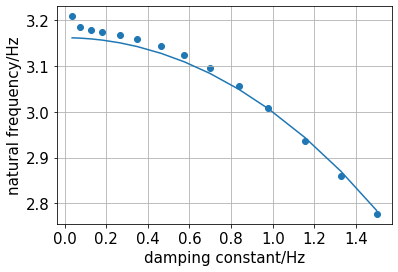

In [81]:
plt.scatter(lambda_list,omega_list)
plt.plot(lambda_list,func2(lambda_list,10))
plt.grid(b=True, which='major', axis='both')
format("damping constant/Hz"  , "natural frequency/Hz")


a alias k/THeta

In [46]:
a

NameError: name 'a' is not defined

Fehler von a alsias k/theta

In [ ]:
a_Fehler=pvov2[0]

In [20]:
len(omega_list)

14

In [21]:
print('The eigenfrequency is',np.sqrt(a))

NameError: name 'a' is not defined